In [1]:
import numpy as np
import pandas as ps
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print('Num GPUs Available: ', len(physical_devices))
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print('No GPUs Available.')

No GPUs Available.


Preparing data

In [44]:
root_images_folder='D:\plant image classification\images'
root_directories=os.listdir(root_images_folder)
required_directories=[]



train_path= 'D:/plant image classification/plant-classsification/train'
test_path='D:/plant image classification/plant-classsification/test'



for i in root_directories :
    b=os.listdir(f'{root_images_folder}\{i}')
    if len(b)>=50:
        shutil.move(f'{root_images_folder}\{i}',train_path)


In [18]:
train_path= 'D:/plant image classification/plant-classsification/train'
test_path='D:/plant image classification/plant-classsification/test'

for i in os.listdir(train_path):
    source=f'{train_path}/{i}'
    destination=f'{test_path}/{i}'
    
    if not os.path.exists(destination):
        os.makedirs(destination)
    train_path_images=os.listdir(source)
    rand_images=random.sample(train_path_images,k=int(len(train_path_images)*0.2))
    
    for j in rand_images:
        shutil.move(f'{source}/{j}',f'{destination}/{j}')   

In [24]:
train_path= 'D:/plant image classification/plant-classsification/train'
test_path='D:/plant image classification/plant-classsification/test'

classes_plant = os.listdir(train_path)

In [25]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=classes_plant,batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=classes_plant,batch_size=10)

Found 9532 images belonging to 131 classes.
Found 9532 images belonging to 131 classes.


In [26]:
imgs,labels=next(train_batches)

In [27]:
def plotImages(images_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

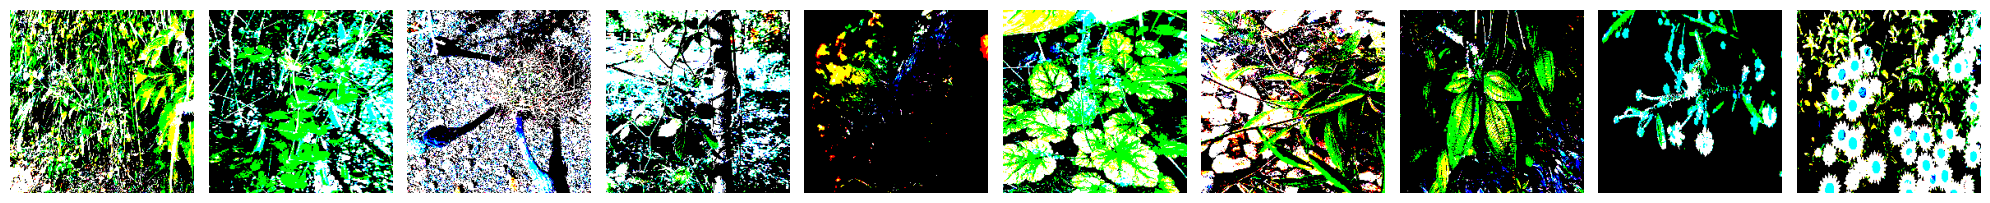

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
plotImages(imgs)
print(labels)